**What is the most optimal skill to learn for Data Analyst?**

Methology  
1. Group skills to determine median salary and likelihood of being in posting  
2. Visualize median salary vs percent skill demand  
3. (Optional) Determine if certain technologies are more prevalent

Importing, Loading and CLeaning...

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\VINAMRA SHUKLA\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

--------------------------------------------

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [5]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [10]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


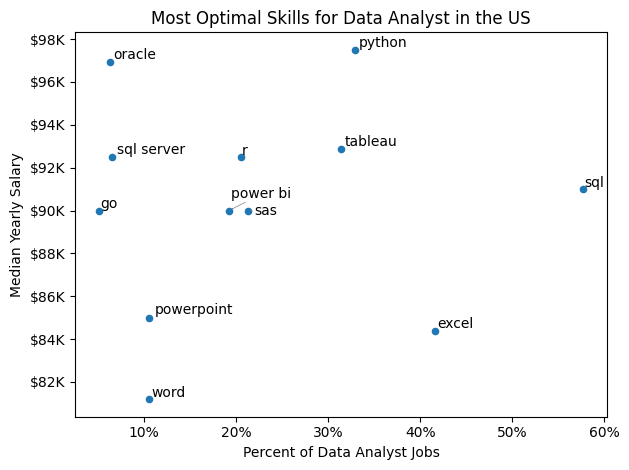

In [15]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind = 'scatter', x = 'skill_percent', y = 'median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = 'gray', lw = 0.5))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analyst in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()

Coloring by Technology...

In [16]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'sheets',
  'qlik',
  'word',
  'splunk',
  'cognos',
  'datarobot',
  'alteryx',
  'sharepoint',
  'tableau',
  'nuix',
  'ms access',
  'visio',
  'dax',
  'msaccess',
  'powerbi',
  'powerpoint',
  'microstrategy',
  'spreadsheet',
  'sas',
  'spss',
  'excel',
  'ssis',
  'sap',
  'looker',
  'ssrs',
  'power bi',
  'esquisse'],
 'programming': ['bash',
  'lisp',
  'sass',
  'r',
  'javascript',
  'swift',
  'clojure',
  'visual basic',
  'solidity',
  'go',
  'delphi',
  'haskell',
  'cobol',
  'java',
  'nosql',
  'php',
  'c',
  'ruby',
  'golang',
  'scala',
  'crystal',
  'dart',
  'sql',
  'matlab',
  'vba',
  'python',
  'c++',
  'shell',
  'fortran',
  'assembly',
  'no-sql',
  'objective-c',
  'rust',
  'pascal',
  'typescript',
  'css',
  'mongodb',
  'powershell',
  'elixir',
  'erlang',
  'sas',
  'mongo',
  'ocaml',
  'c#',
  'julia',
  'kotlin',
  'f#',
  'lua',
  'groovy',
  'apl',
  'html',
  'perl',
  'vb.net',
  't-sql',
  'visualba

Converting this into a DataFrame...

In [18]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,sheets
0,analyst_tools,qlik
0,analyst_tools,word
0,analyst_tools,splunk
...,...,...
9,sync,google chat
9,sync,slack
9,sync,mattermost
9,sync,microsoft teams


Merging this with our df_DA_skills_high_demand dataframe....

In [20]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')

Plotting Time!!!

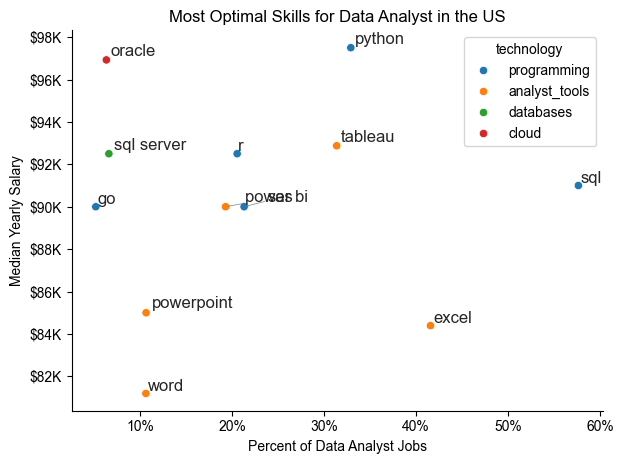

In [22]:
from adjustText import adjust_text

# df_plot.plot(kind = 'scatter', x = 'skill_percent', y = 'median_salary')
sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology'
)

sns.despine()
sns.set_theme(style = 'ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = 'gray', lw = 0.5))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analyst in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()